# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
nltk?


# Data

- Can be found here https://osf.io/tyue9/
- It contains 20K fake reviews and 20K real reviews. Dataset has been sourced from the work done by Joni Salminen et al for their research paper ‘Creating and detecting fake reviews of online products’ https://www.sciencedirect.com/science/article/pii/S0969698921003374?via%3Dihub where they used the Amazon reviews dataset (2018) https://nijianmo.github.io/amazon/index.html and took a sample of 20,000 reviews using the stratified sampling approach on the top 10 categories with the most product reviews. This sample was then used to train a GPT-2 language model to produce 20,000 fake reviews. 2000 reviews were generated per product category and the distribution of the length of fake reviews was calibrated to approximate that of the training sample of real reviews
- The dataset, therefore contains a total of 40,000 Amazon product reviews of which half are fake


In [ ]:
#loading dataframe

df = pd.read_csv('/content/fake reviews dataset (salminen et al).csv')

In [ ]:
#help
pd.read_csv?


# Exploratory Data Analysis (EDA)

In [ ]:
#glance at the dataset

df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df.shape

(40432, 4)

In [ ]:
#checking for null objects

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [ ]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

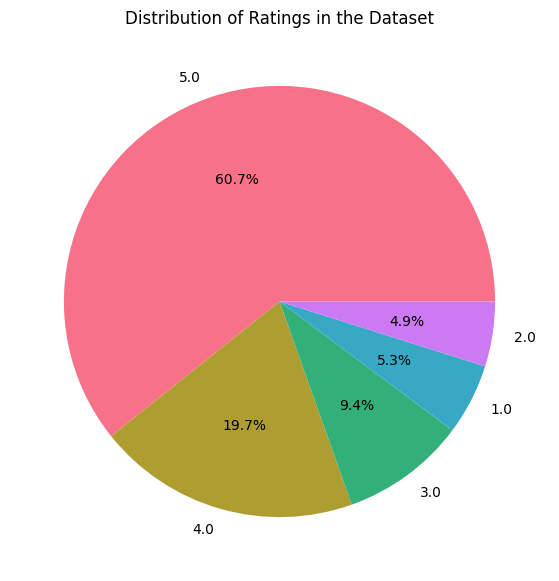

In [ ]:
# create a pie chart of the data based on rating

import matplotlib.pyplot as plt
ratings = df['rating'].value_counts()
labels = ratings.index.to_list()
colors = sns.color_palette('husl', len(ratings))

plt.figure(figsize=(10, 7))
plt.pie(ratings, labels=labels, colors=colors, autopct='%.1f%%')
plt.title('Distribution of Ratings in the Dataset')
plt.show()


In [ ]:
df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

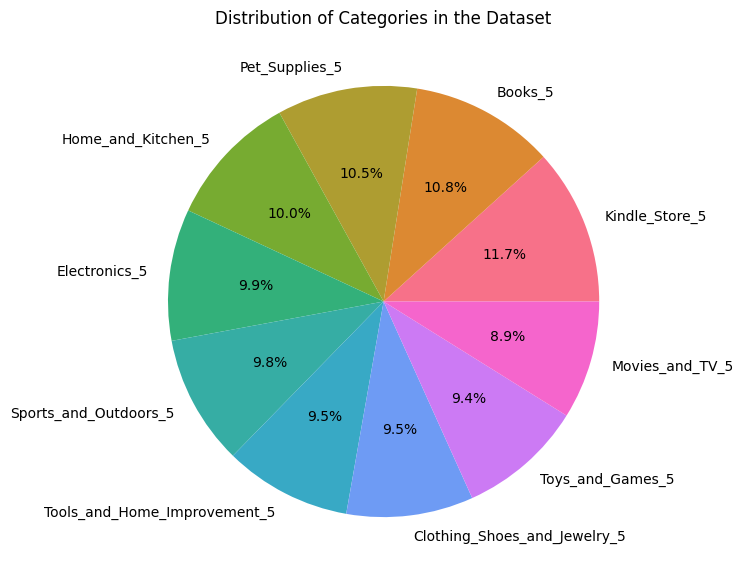

In [ ]:
# create a pie chart based on category

import matplotlib.pyplot as plt
categories = df['category'].value_counts()
labels = categories.index.to_list()
colors = sns.color_palette('husl', len(categories))

plt.figure(figsize=(10, 7))
plt.pie(categories, labels=labels, colors=colors, autopct='%.1f%%')
plt.title('Distribution of Categories in the Dataset')
plt.show()


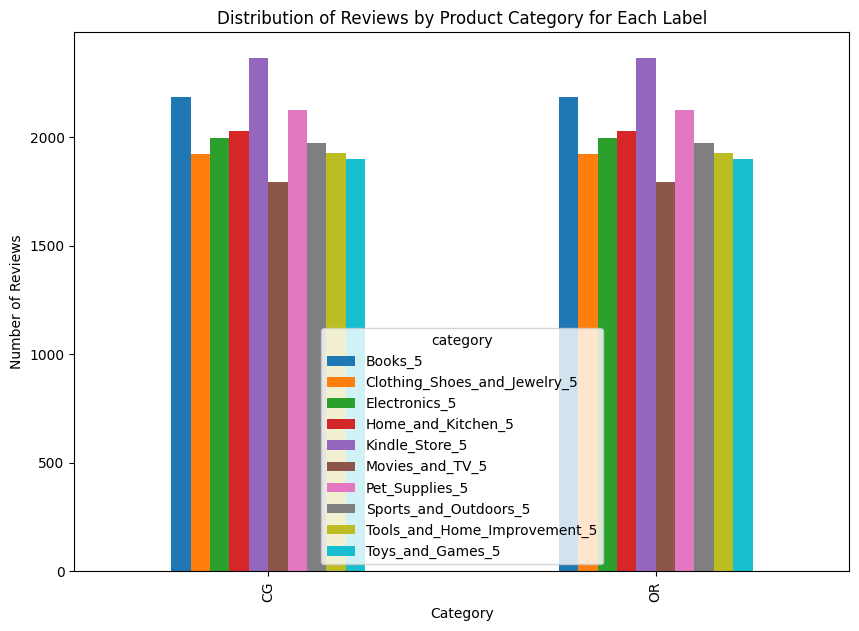

In [ ]:
# show the distribution of reviews by product category for each label

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by label and category
grouped_data = df.groupby(['label', 'category']).size().unstack()

# Plot the data as a bar chart
grouped_data.plot(kind='bar', figsize=(10, 7))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Product Category for Each Label')

# Show the plot
plt.show()


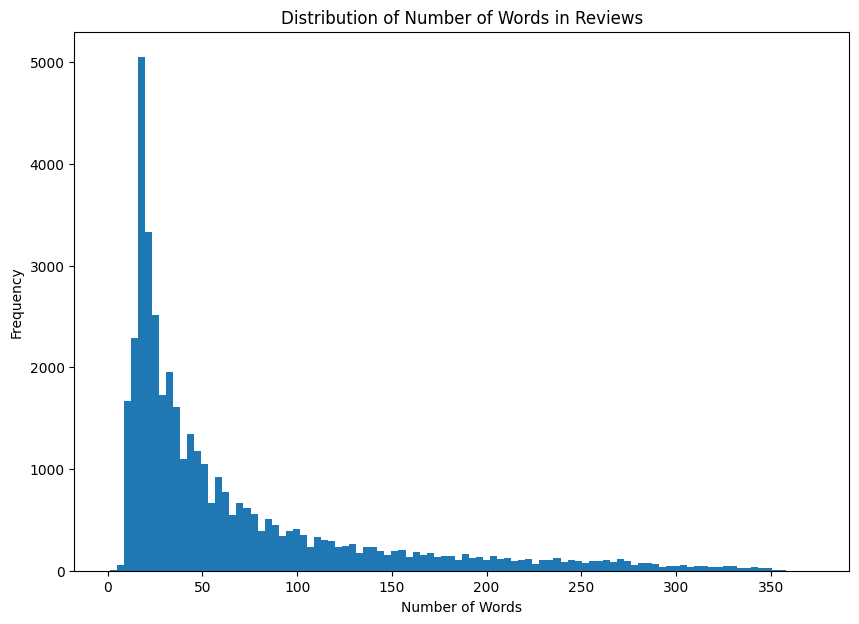

In [ ]:
# show the distribution of number of words in reviews using histogram

import matplotlib.pyplot as plt
# Calculate the number of words in each review
df['word_count'] = df['text_'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts using a histogram
plt.figure(figsize=(10, 7))
plt.hist(df['word_count'], bins=100)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Reviews')
plt.show()


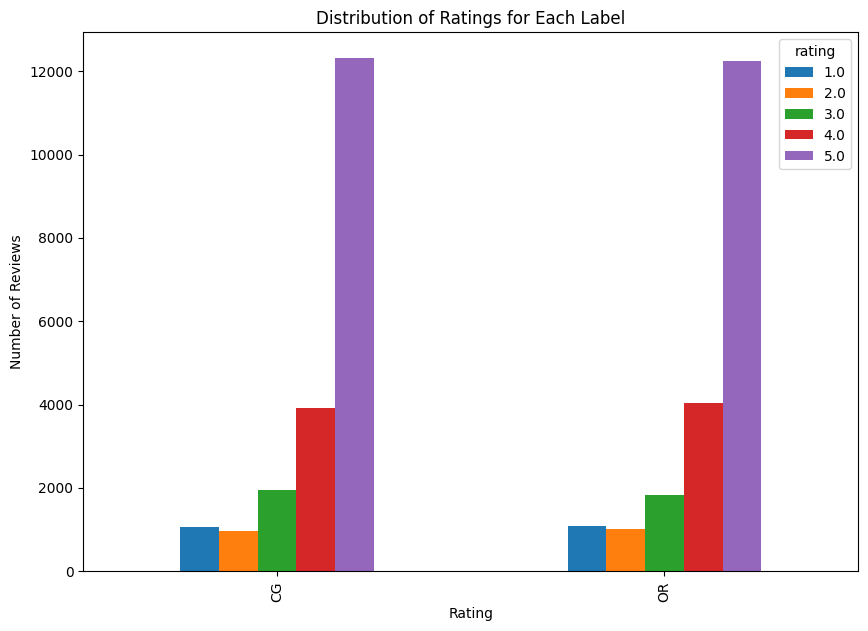

In [ ]:
# show the distribution of rating for each label

import matplotlib.pyplot as plt
# Group the data by label and rating
grouped_data = df.groupby(['label', 'rating']).size().unstack()

# Plot the data as a bar chart
grouped_data.plot(kind='bar', figsize=(10, 7))

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings for Each Label')

# Show the plot
plt.show()


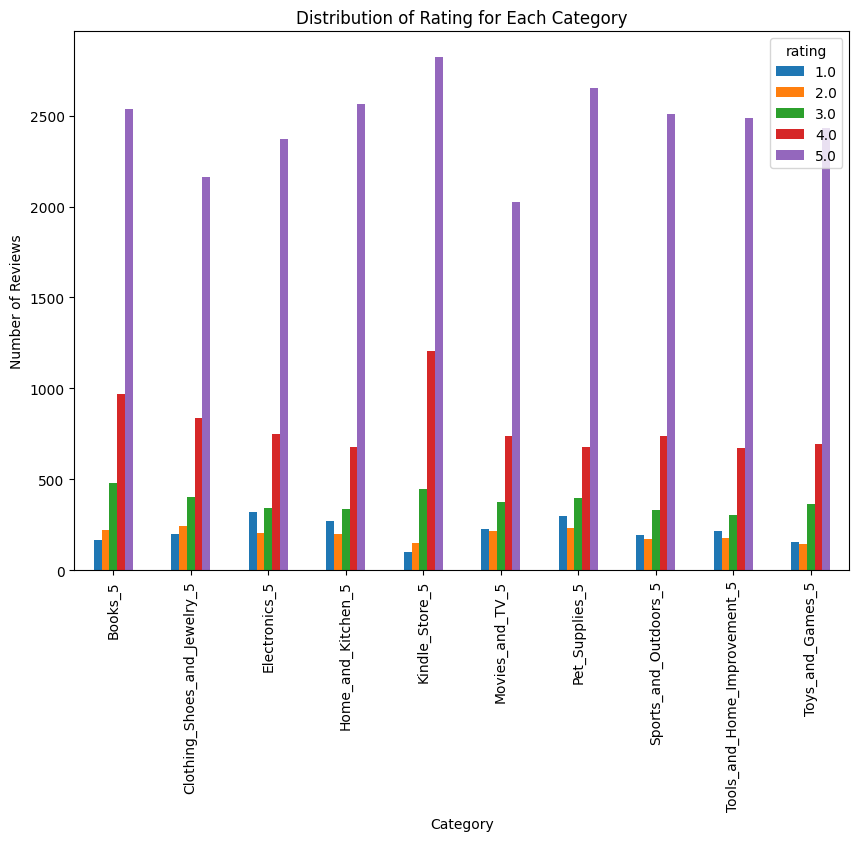

In [ ]:
# show the distribution of rating for each category

import matplotlib.pyplot as plt
# Group the data by category and rating
grouped_data = df.groupby(['category', 'rating']).size().unstack()

# Plot the data as a bar chart
grouped_data.plot(kind='bar', figsize=(10, 7))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Rating for Each Category')

# Show the plot
plt.show()

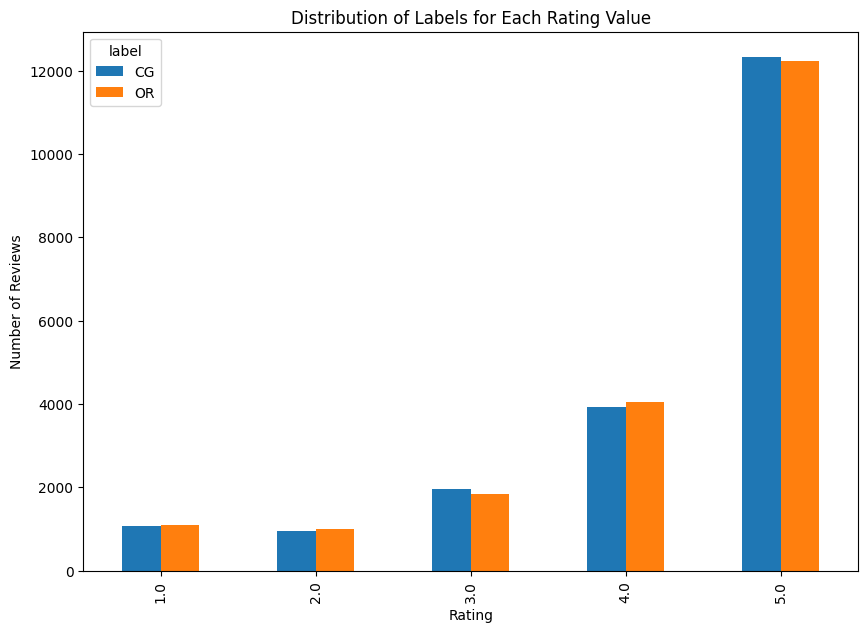

In [ ]:
# show the distribution of labels for each rating value

import matplotlib.pyplot as plt
import pandas as pd



# Group the data by rating and label
grouped_data = df.groupby(['rating', 'label']).size().unstack()

# Plot the data as a bar chart
grouped_data.plot(kind='bar', figsize=(10, 7))

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Labels for Each Rating Value')

# Show the plot
plt.show()


# Data Preprocessing

reference https://www.datacamp.com/tutorial/text-classification-python

Remove all special characters
Lowercase all the words
Tokenize
Remove stopwords
Lemmatize



In [ ]:
#df['text_']

0        Love this!  Well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  I...
2        This pillow saved my back. I love the look and...
3        Missing information on how to use it, but it i...
4        Very nice set. Good quality. We have had the s...
                               ...                        
40427    I had read some reviews saying that this bra r...
40428    I wasn't sure exactly what it would be. It is ...
40429    You can wear the hood by itself, wear it with ...
40430    I liked nothing about this dress. The only rea...
40431    I work in the wedding industry and have to wor...
Name: text_, Length: 40432, dtype: object

In [ ]:
#reference GAIP text mining session 1 ipynb
'''

# text preprocessing
# download nltk
import nltk
nltk.download('wordnet')
#nltk.download('all')
# create a list text
text = list(data['text'])
# preprocessing loop
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []
'''

"\n\n# text preprocessing\n# download nltk\nimport nltk\nnltk.download('wordnet')\n#nltk.download('all')\n# create a list text\ntext = list(data['text'])\n# preprocessing loop\nimport re\n\nfrom nltk.corpus import stopwords\n\nfrom nltk.stem import WordNetLemmatizer\n\nlemmatizer = WordNetLemmatizer()\n\ncorpus = []\n"

In [ ]:
# download nltk

import nltk

nltk.download('all')



# create a list text

review_text = list(df['text_'])



# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

NameError: name 'df' is not defined

In [ ]:
# text preprocessing

'''
# download nltk

import nltk

nltk.download('wordnet')



# create a list text

review_text = list(df['text_'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

'''


corpus = []




for i in range(len(review_text)):

    r = re.sub('[^a-zA-Z]', ' ', review_text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

df['text_'] = corpus

df.head(20)

,category,rating,label,text_,word_count
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love pretty,12
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original mine couple year,16
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow,14
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price,17
4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month,18
5,Home_and_Kitchen_5,3.0,CG,wanted different flavor,8
6,Home_and_Kitchen_5,5.0,CG,perfect touch thing wish little space,19
7,Home_and_Kitchen_5,3.0,CG,done fit well look great love smoothness edge ...,17
8,Home_and_Kitchen_5,5.0,CG,great big number easy read thing like size,18
9,Home_and_Kitchen_5,5.0,CG,son love comforter well made also baby,16


In [ ]:
df['text_']

0            love well made sturdy comfortable love pretty
1             love great upgrade original mine couple year
2                  pillow saved back love look feel pillow
3              missing information use great product price
4                      nice set good quality set two month
                               ...                        
40427    read review saying bra ran small ordered two b...
40428    sure exactly would little large small size thi...
40429    wear hood wear hood wear jacket without hood s...
40430    liked nothing dress reason gave star ordered s...
40431    work wedding industry work long day foot outsi...
Name: text_, Length: 40432, dtype: object

In [ ]:
df

,category,rating,label,text_,word_count
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love pretty,12
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original mine couple year,16
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow,14
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price,17
4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month,18
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,read review saying bra ran small ordered two b...,329
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,sure exactly would little large small size thi...,270
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,wear hood wear hood wear jacket without hood s...,343
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,liked nothing dress reason gave star ordered s...,278


Writing Preprocessed Dataframe to a CSV File

In [ ]:
#writing preprocessed dataframe to csv file

reference https://www.digitaltrends.com/computing/how-to-find-and-copy-a-file-path-on-mac/
reference https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/

In [ ]:
df.to_csv(r'/content/preprocessed fke review data.csv')

# Model Training and Evaluation

In [ ]:
#Imports



In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#train_test_split?


In [ ]:
#pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40432 non-null  int64  
 1   category    40432 non-null  object 
 2   rating      40432 non-null  float64
 3   label       40432 non-null  int64  
 4   text_       40431 non-null  object 
 5   word_count  40432 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.9+ MB


In [ ]:
'''
#DROP THE NULL ROWS
pp_df = pp_df.dropna(how='any',axis=0)

pp_df.info()
'''

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40431 non-null  int64  
 1   category    40431 non-null  object 
 2   rating      40431 non-null  float64
 3   label       40431 non-null  int64  
 4   text_       40431 non-null  object 
 5   word_count  40431 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [ ]:
#pp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40431 non-null  int64  
 1   category    40431 non-null  object 
 2   rating      40431 non-null  float64
 3   label       40431 non-null  int64  
 4   text_       40431 non-null  object 
 5   word_count  40431 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [ ]:
#pp_df.to_csv(r'/content/pp fake review data.csv')

final_data = pd.read_csv('pp fake review data with lemmatization.csv')

In [ ]:
final_data.head()

,category,rating,label,text_,word_count
0,Home_and_Kitchen_5,5,1,love well made sturdy comfortable love pretty,12
1,Home_and_Kitchen_5,5,1,love great upgrade original mine couple year,16
2,Home_and_Kitchen_5,5,1,pillow saved back love look feel pillow,14
3,Home_and_Kitchen_5,1,1,missing information use great product price,17
4,Home_and_Kitchen_5,5,1,nice set good quality set two month,18


In [ ]:
type(final_data['text_'][0])

str

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40431 entries, 0 to 40430
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    40431 non-null  object
 1   rating      40431 non-null  int64 
 2   label       40431 non-null  int64 
 3   text_       40431 non-null  object
 4   word_count  40431 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ MB


In [ ]:
# Create Feature and Label sets

X = final_data['text_']

y = final_data['label']




# train test split (80% train - 20% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (32344,)
Testing Data :  (8087,)


In [ ]:
'''
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer  = CountVectorizer()
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

X_train_cv = count_vectorizer.fit_transform(X_train)
'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\n\ncount_vectorizer  = CountVectorizer()\ncount_vectorizer.fit(X_train)\nprint('\nVocabulary: \n', count_vectorizer.vocabulary_)\n\nX_train_cv = count_vectorizer.fit_transform(X_train)\n"

Here, we use the Bag of Words model (CountVectorizer) to convert the cleaned text into numeric features. This is needed for training the machine learning model.

In [ ]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()

X_train_cv = count_vec.fit_transform(X_train)

X_train_cv.shape

(32344, 30925)

1. SVM Model with
- hinge loss
- l2 regularization
- regularization hyperparameter (C) = 1.0
- no cross validation

In [ ]:
# run a SVM model using linear svc with hinge loss and l2 regularization, regularization parameter 1.0. Show training accuracy

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train a LinearSVC model with hinge loss and l2 regularization
model = LinearSVC(loss='hinge', penalty='l2', C=1.0)
model.fit(X_train_cv, y_train)

# Calculate the training accuracy
y_pred_train = model.predict(X_train_cv)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print the training accuracy
print('Training Accuracy:', train_accuracy)


Training Accuracy: 0.9528815236210735


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# check testing accuracy of the above model

# Calculate the testing accuracy
y_pred_test = model.predict(count_vec.transform(X_test))
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the testing accuracy
print('Testing Accuracy:', test_accuracy)


Testing Accuracy: 0.8638555706689749


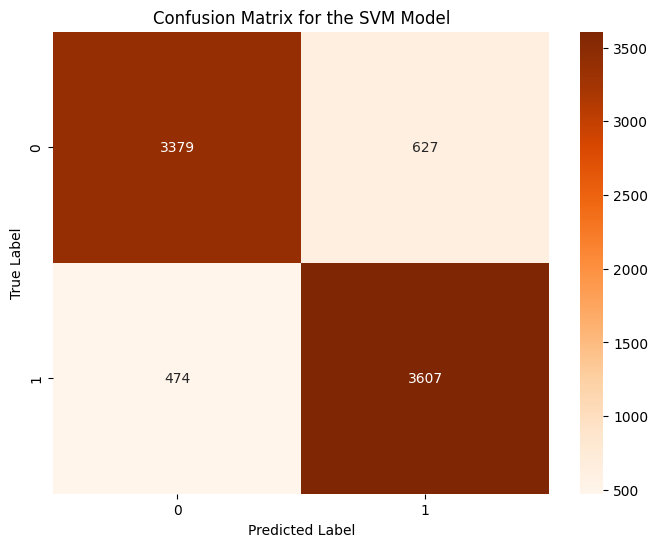

In [ ]:
# show confusion matrix graph for above model orange

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create a bar chart for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the SVM Model')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.88      0.84      0.86      4006
           1       0.85      0.88      0.87      4081

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



2. SVM Model with
- hinge loss
- l2 regularization
- regularization hyperparameter (C) = 0.15
- 5 fold cross validation

In [ ]:
# run a SVM modelusing linear svc with hinge loss and l2 regularization. Use 5 fold cross validation to decide regularization parameter

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the model
model_FRD = LinearSVC(loss='hinge', penalty='l2')

# Define the hyperparameter grid
param_grid = {'C': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model_FRD, param_grid, cv=5)
grid_search.fit(X_train_cv, y_train)

# Get the best model
best_model_FRD = grid_search.best_estimator_

# Print the best hyperparameters
print('Best C:', best_model_FRD.C)

# Calculate the training accuracy
y_pred_train = best_model_FRD.predict(X_train_cv)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print the training accuracy
print('Training Accuracy:', train_accuracy)

# Evaluate the best model on the test set
y_pred_test = best_model_FRD.predict(count_vec.transform(X_test))
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the test accuracy
print('Test accuracy:', test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best C: 0.15
Training Accuracy: 0.922180311649765
Test accuracy: 0.8712748856188945


Downloading SVM Model and Vectorizer Function in pickle form

In [ ]:
import pickle
from google.colab import files

In [ ]:
with open('svm_model_FRD.pkl', 'wb') as f:
    pickle.dump(best_model_FRD, f)

# Download the pickle file
files.download('svm_model_FRD.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the CountVectorizer to a pickle file
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vec, f)

# Download the pickle file
files.download('count_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Trying Logistic Regression

In [ ]:
# run a logistic regression. show training accuracy and testing accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Instantiate the LogisticRegression model
logreg = LogisticRegression(max_iter = 1000,penalty="l2",C=0.9)

# Fit the model on the training data
logreg.fit(X_train_cv, y_train)

# Predict on the training data
y_train_pred = logreg.predict(X_train_cv)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = logreg.predict(count_vec.transform(X_test))

# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9348256245362355
Testing Accuracy: 0.8788178558179794


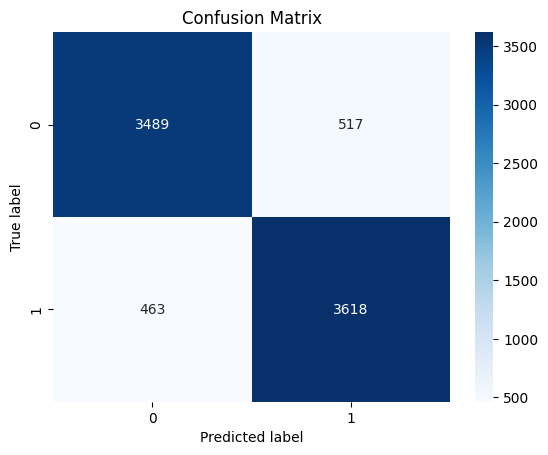

In [ ]:
# show the confusion  matrix graph for the model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = logreg.predict(count_vec.transform(X_test))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.88      0.87      0.88      4006
           1       0.87      0.89      0.88      4081

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087



# Taking in user input and testing on it

In [ ]:
user_input = input('Enter a product review: ')

Enter a product review: I recently purchased the XYZ Wireless Earbuds, and I have to say, they are absolutely amazing! From the moment I opened the sleek, stylish packaging, I knew I was in for a treat. The earbuds themselves are incredibly comfortable, and they fit perfectly in my ears without falling out, even during intense workouts. The sound quality is phenomenal – crisp highs, deep bass, and excellent noise cancellation that makes you feel like you're in your own world. The battery life is also impressive, lasting well over 10 hours on a single charge. Pairing with my devices was a breeze, and the connection is rock solid. I highly recommend these earbuds to anyone looking for high-quality, reliable, and stylish wireless earbuds. Five stars!


In [ ]:
#preprocessing user data

# download nltk

import nltk

nltk.download('all')



# create a list text

review_text = user_input



# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
#writing a function to preprocess user review

def preprocess_review(review):

  r = re.sub('[^a-zA-Z]', ' ', review)

  r = r.lower()

  r = r.split()

  r = [word for word in r if word not in stopwords.words('english')]

  r = [lemmatizer.lemmatize(word) for word in r]

  r = ' '.join(r)

  return r


'''


for i in range(len(review_text)):

    r = re.sub('[^a-zA-Z]', ' ', review_text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

df['text_'] = corpus

df.head(20)

'''

"\n\n\nfor i in range(len(review_text)):\n\n    r = re.sub('[^a-zA-Z]', ' ', review_text[i])\n\n    r = r.lower()\n\n    r = r.split()\n\n    r = [word for word in r if word not in stopwords.words('english')]\n\n    r = [lemmatizer.lemmatize(word) for word in r]\n\n    r = ' '.join(r)\n\n    corpus.append(r)\n\n\n\n\n#assign corpus to data['text']\n\ndf['text_'] = corpus\n\ndf.head(20)\n\n"

In [ ]:
# preprocessing the review

cleaned_review = preprocess_review(review_text)

print(cleaned_review)
type(cleaned_review)

recently purchased xyz wireless earbuds say absolutely amazing moment opened sleek stylish packaging knew treat earbuds incredibly comfortable fit perfectly ear without falling even intense workout sound quality phenomenal crisp high deep bass excellent noise cancellation make feel like world battery life also impressive lasting well hour single charge pairing device breeze connection rock solid highly recommend earbuds anyone looking high quality reliable stylish wireless earbuds five star


str

In [ ]:
# how do I convert cleaned_review to bag of words form using count vectorizer

label = best_model_FRD.predict(count_vec.transform([cleaned_review]))

'''
cleaned_review_bag_of_words = count_vec.fit_transform([cleaned_review])

print(cleaned_review_bag_of_words)

X_array = cleaned_review_bag_of_words.toarray()

X_array.shape
'''

ValueError: X has 61 features, but LinearSVC is expecting 30925 features as input.

In [ ]:
#predicting label

label = best_model_FRD.predict(X_array)





ValueError: X has 61 features, but LinearSVC is expecting 30925 features as input.